In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 서울시 범죄 현황

In [2]:
pol = pd.read_csv('./cctv/서울시 범죄현황.txt', sep='\t', header=1)
pol.head(11)

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,"103,668","74,805",136,128,136,133,"6,469","6,007","42,204","21,284","54,723","47,253"
1,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
4,2019,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
5,2019,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"
6,2019,동대문구,"3,692","2,818",6,6,10,9,168,143,"1,531",827,"1,977","1,833"
7,2019,중랑구,"4,268","3,138",10,10,4,5,138,108,"1,666",908,"2,450","2,107"
8,2019,성북구,"2,877","2,323",3,3,3,3,176,130,"1,082",731,"1,613","1,456"
9,2019,강북구,"3,838","3,023",6,6,3,2,176,145,"1,229",664,"2,424","2,206"


In [3]:
# nan값 확인
pol.isnull().values.any()

False

In [4]:
pol.rename({'자치구' : '구별',
            '발생': '발생합계',
            '검거':'검거합계',
            '발생.1' : '살인발생',
            '검거.1': '살인검거',
            '발생.2':'강도발생',
            '검거.2': '강도검거',
            '발생.3': '강간발생',
            '검거.3': '강간검거',
            '발생.4':'절도발생',
            '검거.4':'절도검거',
            '발생.5' : '폭력발생',
            '검거.5': '폭력검거'},  inplace=True, axis=1)
pol.head()

,기간,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,2019,합계,"103,668","74,805",136,128,136,133,"6,469","6,007","42,204","21,284","54,723","47,253"
1,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
4,2019,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"


In [5]:
pol.drop([0], inplace= True)
pol.head()

,기간,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
4,2019,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
5,2019,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"


In [6]:
del pol['기간']
pol.head()

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
4,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
5,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"


In [7]:
pol

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
4,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
5,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"
6,동대문구,"3,692","2,818",6,6,10,9,168,143,"1,531",827,"1,977","1,833"
7,중랑구,"4,268","3,138",10,10,4,5,138,108,"1,666",908,"2,450","2,107"
8,성북구,"2,877","2,323",3,3,3,3,176,130,"1,082",731,"1,613","1,456"
9,강북구,"3,838","3,023",6,6,3,2,176,145,"1,229",664,"2,424","2,206"
10,도봉구,"2,110","1,497",1,1,5,5,90,83,790,394,"1,224","1,014"


In [8]:
pol['발생합계'] = pol['발생합계'].map(lambda s: int(s.replace(',','')))
pol['검거합계'] = pol['검거합계'].map(lambda s: int(s.replace(',','')))
pol['강간발생'] = pol['강간발생'].map(lambda s: int(s.replace(',','')))
pol['강간검거'] = pol['강간검거'].map(lambda s: int(s.replace(',','')))
pol['절도발생'] = pol['절도발생'].map(lambda s: int(s.replace(',','')))
pol['절도검거'] = pol['절도검거'].map(lambda s: int(s.replace(',','')))
pol['폭력발생'] = pol['폭력발생'].map(lambda s: int(s.replace(',','')))
pol['폭력검거'] = pol['폭력검거'].map(lambda s: int(s.replace(',','')))
pol.head()

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


## 서울시 인구 현황

In [9]:
pop = pd.read_csv('./cctv/서울시 인구.tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [10]:
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [11]:
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [12]:
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [13]:
pop.drop([0], inplace= True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [14]:
# 외국인 비율 & 고령자 비율 추가 
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


### pandas의 pivot_table 학습하기

In [15]:
# 데이터 불러오기
df= pd.read_excel('./cctv/salesfunnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [16]:
#Name 항목으로만 정렬하고 싶을때 pivot_table을 사용.
pd.pivot_table(df,index=['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [17]:
# Index를 여러 개 지정.
pd.pivot_table(df,index=['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [18]:
# 특정 value만 지정.
pd.pivot_table(df,index=['Manager','Rep'], values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [19]:
# value 값의 합계를 구하고 싶다면, aggfunc 옵션의 np.sum을 사용.
pd.pivot_table(df, index=['Manager','Rep'], values=["Price"], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [20]:
# Index와 value를 지정하고, 각 value에 대해 합과 평균을 표시.
# Nan이 나타나면 0으로 채운다.
pd.pivot_table(df, index=['Manager','Rep','Product'],
              values=['Price','Quantity'],
              aggfunc=[np.sum, np.mean], fill_value=0,margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

### Pivot_tabel을 이용해서 데이터 정리

In [21]:
# 서울시 범죄현황
pol.head()

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [22]:
# pivot_table을 이용하여 데이터를 관서별에서 구별로 바꿈
crime_anal = pd.pivot_table(pol, index=['구별'],aggfunc=np.sum)
crime_anal.head()

,강간검거,강간발생,강도검거,강도발생,검거합계,발생합계,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,,
강남구,562,666,6,5,5069,7304,3,5,1339,2970,3159,3658
강동구,155,180,14,15,2955,4014,5,6,907,1650,1874,2163
강북구,145,176,2,3,3023,3838,6,6,664,1229,2206,2424
강서구,257,306,4,3,3543,4924,9,8,1077,2050,2196,2557
관악구,335,408,11,10,3810,5328,10,13,1085,2223,2369,2674


In [23]:
del crime_anal['검거합계']
del crime_anal['발생합계']
crime_anal.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,562,666,6,5,3,5,1339,2970,3159,3658
강동구,155,180,14,15,5,6,907,1650,1874,2163
강북구,145,176,2,3,6,6,664,1229,2206,2424
강서구,257,306,4,3,9,8,1077,2050,2196,2557
관악구,335,408,11,10,10,13,1085,2223,2369,2674


In [24]:
crime_anal['강간검거율'] = crime_anal['강간검거'] / crime_anal['강간발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도검거'] / crime_anal['강도발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인검거'] / crime_anal['살인발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도검거'] / crime_anal['절도발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력검거'] / crime_anal['폭력발생'] * 100

del crime_anal['강간검거']
del crime_anal['강도검거']
del crime_anal['살인검거']
del crime_anal['절도검거']
del crime_anal['폭력검거']

crime_anal.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,120.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,133.333333,112.500000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,110.000000,76.923077,48.807917,88.593867


In [25]:
# 검거율 100이 넘는 숫자는 100으로 처리
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

In [26]:
crime_anal.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,100.000000,76.923077,48.807917,88.593867


In [27]:
# 발생 단어 삭제하기
crime_anal.rename(columns = {'강간발생' : '강간', '강도발생': '강도', '살인발생': '살인', '절도발생':'절도', '폭력발생': '폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,666,5,5,2970,3658,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,180,15,6,1650,2163,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,176,3,6,1229,2424,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,306,3,8,2050,2557,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,408,10,13,2223,2674,82.107843,100.000000,76.923077,48.807917,88.593867


### 데이터 표현을 위해 다듬기

### 정규화(normalize)
- 모듈 scikit learn에 이쓴 전처리(preprocessing)도구에는 최소값, 최대값을 이용하여 정규화 시키는 함수가 있음

In [28]:
# 발생 건수 정규화
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled,
                              columns = col,
                              index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867


### 서울시 CCTV 설치현황

In [29]:
re_cctv = pd.read_excel('./cctv/서울시 자치구 년도별 CCTV 설치 현황.xlsx')
re_cctv.head(6)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346


In [30]:
re_cctv.rename(columns={re_cctv.columns[0]: '구별'}, inplace=True)
re_cctv.tail(6)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


In [31]:
re_cctv.isnull().values.any()

True

In [32]:
# nen값 0으로 변경
re_cctv.fillna(0, inplace=True)
re_cctv.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,0.0,0.0,0.0,770,102,121,66,9


In [33]:
re_cctv['2015년 이전'] = re_cctv['2011년 이전'] + re_cctv['2012년'] + re_cctv['2013년'] + re_cctv['2014년'] + re_cctv['2015년']
re_cctv.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
20,용 산 구,2063,1279.0,152.0,201.0,107,102,89,60,73,1841.0
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367,2070.0
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,941.0
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,629.0
24,중 랑 구,1068,0.0,0.0,0.0,770,102,121,66,9,872.0


In [34]:
re_cctv['구별'] = re_cctv['구별'].map(lambda s: s.replace(' ', ''))
re_cctv.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,1027.0
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,909.0
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0


In [35]:
del re_cctv['2011년 이전']
del re_cctv['2012년']
del re_cctv['2013년']
del re_cctv['2014년']
del re_cctv['2015년']
re_cctv = re_cctv[['구별', '소계', '2015년 이전', '2016년', '2017년', '2018년']]
re_cctv.tail()

,구별,소계,2015년 이전,2016년,2017년,2018년
20,용산구,2063,1841.0,89,60,73
21,은평구,2962,2070.0,296,229,367
22,종로구,1471,941.0,148,281,101
23,중구,1544,629.0,270,317,328
24,중랑구,1068,872.0,121,66,9


In [36]:
re_cctv.set_index('구별', inplace=True)

In [37]:
re_cctv.head()

,소계,2015년 이전,2016년,2017년,2018년
구별,,,,,
강남구,5221,3431.0,765,577,448
강동구,1879,1027.0,194,273,385
강북구,1265,691.0,254,1,319
강서구,1617,909.0,190,264,254
관악구,3985,2001.0,619,694,671


In [40]:
pop_sv = pop[['구별','인구수','내국인','외국인','고령자']]
pop_sv.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [41]:
pop_sv.set_index('구별', inplace=True)
pop_sv.head()

,인구수,내국인,외국인,고령자
구별,,,,
종로구,159842,149952,9890,28396
중구,135321,125800,9521,24265
용산구,244953,229786,15167,39995
성동구,302695,295591,7104,45372
광진구,361923,348064,13859,50047


In [45]:
# 구별 인구수와 CCTV 개수를 가져오자(단, 인덱스 기준이 구별로 되있으므로 꼭 인덱스 확인!)
crime_anal_norm['인구수'] = pop_sv['인구수']
crime_anal_norm['CCTV'] = re_cctv['소계']
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985


In [46]:
# 각 범죄 발생 건수에 대해 합을 구해 '범죄'라는 컬럼을 새로 만듬
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,3.619048
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,2.353197
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,2.226830
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,3.448007


In [47]:
# 위와 마찬가지로 각 검거율의 합을 구하여 '검거'라는 컬럼을 만들자
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,3.619048,375.827225
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,2.353197,404.386402
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221,394.087296
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,2.226830,422.405406
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,3.448007,396.432704
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,1.680980,400.652278
구로구,0.236111,0.142857,0.750000,0.516514,0.545604,73.008850,100.000000,90.000000,50.365344,84.169279,435751,3227,2.191086,397.543473
금천구,0.109375,0.642857,0.416667,0.168349,0.228020,82.352941,60.000000,100.000000,53.154710,89.376054,249641,1634,1.565267,384.883706
노원구,0.163194,0.142857,0.250000,0.324771,0.509449,85.869565,100.000000,100.000000,45.460614,85.957792,529532,1906,1.390272,417.287972


### 범죄데이터 시각화

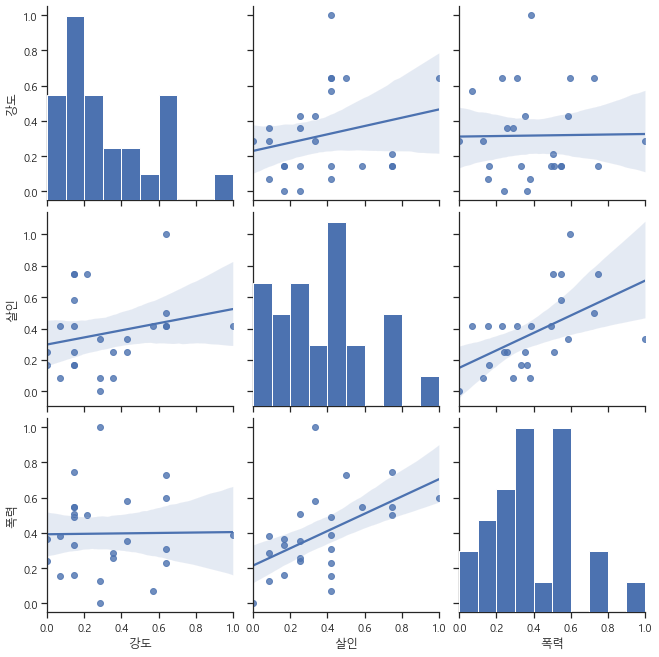

In [70]:
# 강도와 폭력, 살인과 폭력, 강도와 살인의 상관관계를 확인하자
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

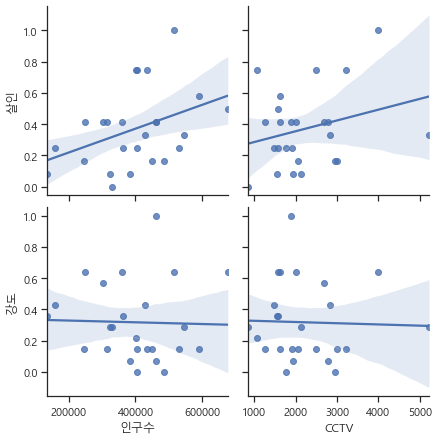

In [71]:
# 인구수, CCTV개수와 살인, 강도의 상관관계
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'],
             y_vars=['살인', '강도'], kind='reg', height=3)
plt.show()

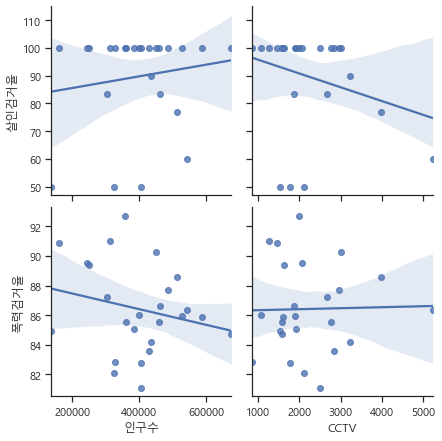

In [72]:
# 인구수, CCTV와 살인검거율, 폭력검거율의 상관관계
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인검거율', '폭력검거율'], kind='reg', height=3)
plt.show()

In [67]:
# 검거율의 합계인 검거 항목 최고 값을 100으로 한정하고 그 값으로 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_nrom_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_nrom_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.0,100.0,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.180556,0.000000,0.166667,0.355505,0.366886,83.505155,100.0,100.0,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.149306,0.142857,0.166667,0.133945,0.159819,73.863636,100.0,100.0,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.0,100.0,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,92.222222,100.0,100.0,49.873418,82.843137,329300,858,0.285714,92.090669


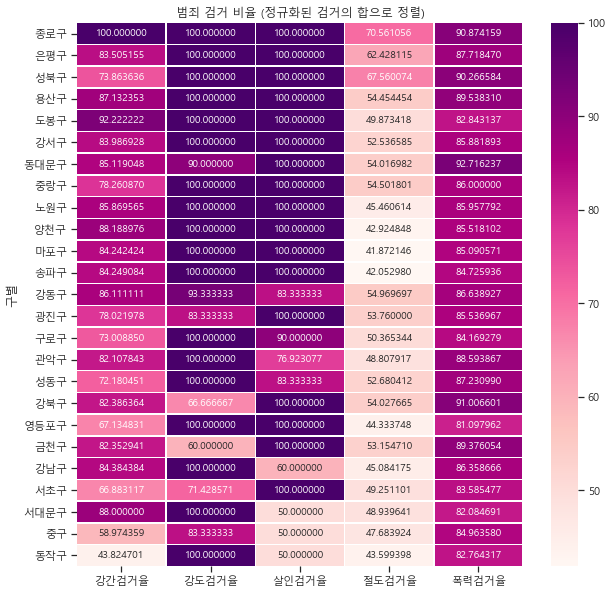

In [73]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f',
           linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

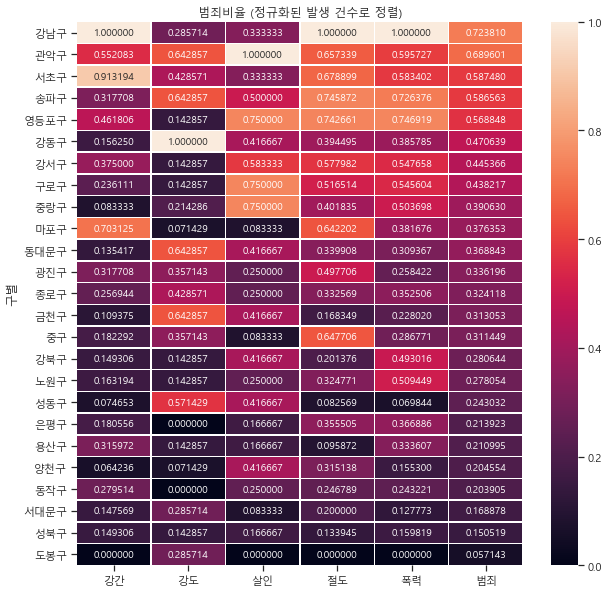

In [74]:
# 범죄 발생 건수 heatmap 시각화
target_col=['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [75]:
# crime_anal_norm.to_csv('./cctv/02.crime_in_final.csv', sep=',', encoding='utf-8')

### 지도에 표시하기

In [77]:
import folium
import googlemaps

In [79]:
map_osm = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
map_osm

In [85]:
# json파일 로딩
import json
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [86]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 살인 발생 건수로 지정하자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [87]:
# 강간 발생 건수로 다시 그려보자.

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [88]:
# 범죄 발생건수

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [89]:
# 범죄 전체 발생건수에 인구수를 나누고 소수점 밑으로 가서 적절한 값을 곱한다.
tmp_criminal = crime_anal_norm['살인']/ crime_anal_norm['인구수'] *1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

### 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화하기

In [92]:
key_fd = open('../06.reapi/googlemapskey.txt', mode='r')
gmaps_key = key_fd.read(100)
key_fd.close()
gmaps = googlemaps.Client(key=gmaps_key)

In [93]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [98]:
station_name=[]

for name in pol['구별']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')
    
station_name

['서울종로경찰서',
 '서울중경찰서',
 '서울용산경찰서',
 '서울성동경찰서',
 '서울광진경찰서',
 '서울동대문경찰서',
 '서울중랑경찰서',
 '서울성북경찰서',
 '서울강북경찰서',
 '서울도봉경찰서',
 '서울노원경찰서',
 '서울은평경찰서',
 '서울서대문경찰서',
 '서울마포경찰서',
 '서울양천경찰서',
 '서울강서경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울영등포경찰서',
 '서울동작경찰서',
 '서울관악경찰서',
 '서울서초경찰서',
 '서울강남경찰서',
 '서울송파경찰서',
 '서울강동경찰서']

In [99]:
# 경찰서의 이름을 활용하여 주소받기.
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address')) # 경찰서 주소 추가
    
    tmp_loc = tmp[0].get('geometry')
    
    station_lat.append(tmp_loc['location']['lat']) # 경찰서 위치의 위도 추가
    
    station_lng.append(tmp_loc['location']['lng']) # 경찰서 위치의 경도 추가
    
    print(name + '-->' + tmp[0].get('formatted_address'))

서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울중경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내동 267-1
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울도봉경찰서-->대한민국 서울특별시 도봉구 창4동 노해로 403
서울노원경찰서-->대한민국 서울특별시 노원구 하계동 노원로 283
서울은평경찰서-->대한민국 서울특별시 은평구 불광동 연서로 365
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울강서경찰서-->대한민국 서울특별시 양천구 신월동 화곡로 73
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57


In [100]:
station_address[:5]

['대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 광진구 구의동 자양로 167']

In [101]:
#위도
station_lat[:5]

[37.5755578, 37.5636465, 37.5387099, 37.5617309, 37.542873]

In [109]:
#경도
station_lng[:5]

[126.9848674, 126.9895796, 126.9659183, 127.0363806, 127.083821]

In [104]:
pol1 = pol[['구별','발생합계','검거합계','살인발생','살인검거','강도발생','강도검거','강간발생','강간검거','절도발생','절도검거','폭력발생','폭력검거']]
pol1.head()

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [105]:
#서울시 범죄현황에 위도와 경도 추가.
pol1['lat'] = station_lat
pol1['lng'] = station_lng

col = ['살인검거', '강도검거', '강간검거', '절도검거', '폭력검거']
tmp = pol1[col] / pol1[col].max()

pol1['검거'] = np.sum(tmp, axis=1)

pol1.head()

,구별,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,lat,lng,검거
1,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892,37.575558,126.984867,3.468709
2,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633,37.563646,126.989580,1.858858
3,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823,37.538710,126.965918,1.776418
4,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,37.561731,127.036381,2.064835
5,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585,37.542873,127.083821,2.298036


In [106]:
#경찰서 위치를 확인.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in pol1.index:
    folium.Marker([pol1['lat'][n],
                   pol1['lng'][n]]).add_to(map)
    
map

In [107]:
# 검거에 적당한 값 10을 곱해서 원 넓이를 정하고, 경찰서의 검거율을 원의 넓이로 표현함.
map =folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in pol1.index:
    folium.CircleMarker([pol1['lat'][n], pol1['lng'][n]],
                        radius = pol1['검거'][n]*10,
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [108]:
# 색상을 붉은 색으로 한 범죄 발생 건수.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on='feature.id')

for n in pol1.index:
    folium.CircleMarker([pol1['lat'][n], pol1['lng'][n]],
                        radius = pol1['검거'][n]*10,
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map